In [211]:
import pandas as pd  
import sqlite3


conn = sqlite3.connect("../Database/database.sqlite")


df_teams = pd.read_sql_query("SELECT * FROM team;", conn)
df_countries = pd.read_sql_query("SELECT * FROM country;", conn)
df_matchs = pd.read_sql_query("SELECT * FROM match;", conn)
df_leagues = pd.read_sql_query("SELECT * FROM league;", conn)
df_player = pd.read_sql_query("SELECT * FROM player;", conn)
df_player_attribute = pd.read_sql_query("SELECT * FROM Player_Attributes;", conn)
df_teams_attributes=pd.read_sql_query("select * from team_attributes;",conn)

df_matchs=df_matchs.drop(columns=['B365H','B365D','B365A','BWH','BWD','BWA','IWH','IWD','IWA','LBH','LBD','LBA','PSH','PSD','PSA','WHH','WHD','WHA','SJH','SJD','SJA','VCH','VCD','VCA','GBH','GBD','GBA','BSH','BSD','BSA'])

conn.close()


In [97]:
player_team=df_player.merge(df_teams)
player_team_att=player_team.merge(df_player_attribute,on='id')
full_team=pd.merge(player_team,df_teams)

full_team.set_index(keys='id').reset_index()


,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,9987,673.0,KRC Genk,GEN
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146,9993,675.0,Beerschot AC,BAC
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198,9994,2007.0,Sporting Lokeren,LOK
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154,9984,1750.0,KSV Cercle Brugge,CEB
...,...,...,...,...,...,...,...,...,...,...,...
78,9556,318493,Sean Kelly,210352,1993-11-01 00:00:00,190.50,174,9853,1819.0,AS Saint-Étienne,ETI
79,10300,27302,Tim Hoogland,164633,1985-06-11 00:00:00,182.88,179,8588,64.0,RC Lens,LEN
80,10309,37326,Tim Sebastian,157395,1984-01-17 00:00:00,187.96,176,10249,70.0,Montpellier Hérault SC,MON
81,10312,26449,Tim Vincken,169425,1986-09-12 00:00:00,175.26,143,4170,111376.0,US Boulogne Cote D'Opale,BOU


In [212]:
df_player_attribute

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


#### Analyse des Joueurs : 
+ extraction des donnees : 

  -> j'ai crée une column "match_id" dans tableaux "final_goals_df"  pour le lie avec match tableaux 

  -> player 1: joueur qui il a marquée 
  
  -> player 2: joueur qui il a assisté ball pour le player 2

In [ ]:
from pre_proccessing import extract_goals



df_without_Nan = df_matchs.dropna(subset=['goal'])
l = df_without_Nan['goal']
all_goals_df = []


for index, value in enumerate(l):
    goal_df = extract_goals.store_goals_to_dataframe(value,df_without_Nan.index[index])
    all_goals_df.append(goal_df)

final_goals_df = pd.concat(all_goals_df, ignore_index=True)
final_goals_df.fillna(1,inplace=True)




/tmp/ipykernel_262998/2962721898.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_goals_df = pd.concat(all_goals_df, ignore_index=True)


In [100]:

link_match_goal_goalkeepers = pd.merge(final_goals_df, df_matchs, left_on='match_id', right_on='id')
link_match_goal_players = pd.merge(link_match_goal_goalkeepers, df_player, left_on='player1', right_on='player_api_id',how='inner')


link_match_goal_assists = pd.merge(link_match_goal_goalkeepers, df_player, left_on='player2', right_on='player_api_id',how='inner')

goal_scorers = link_match_goal_players.groupby(['player_name', 'season'])['goals'].sum().sort_values(ascending=False).reset_index()
assisters = link_match_goal_assists.groupby(['player_name', 'season'])['goals'].sum().sort_values(ascending=False).reset_index()

assisters.rename(columns={
    'goals':'assists'
},inplace=True)
goal_scorers_assists=pd.merge(goal_scorers,assisters,on=['player_name','season'])



top_performers_per_season = (
    goal_scorers_assists.loc[goal_scorers_assists.groupby('season')['goals'].idxmax()]
    )
agoal_scorers_assists=goal_scorers_assists.sort_values(by=['goals','assists'],ascending=False)
agoal_scorers_assists=goal_scorers_assists.sort_values(by=['goals','assists'],ascending=False)
goal_scorers_assists[~agoal_scorers_assists['season'].duplicated()].sort_values(by='season')


/tmp/ipykernel_262998/33983874.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  goal_scorers_assists[~agoal_scorers_assists['season'].duplicated()].sort_values(by='season')


,player_name,season,goals,assists
10,Samuel Eto'o,2008/2009,33.0,3.0
9,Lionel Messi,2009/2010,35.0,9.0
6,Cristiano Ronaldo,2010/2011,40.0,8.0
0,Lionel Messi,2011/2012,52.0,15.0
30,Robin van Persie,2012/2013,28.0,9.0
12,Luis Suarez,2013/2014,32.0,12.0
1,Cristiano Ronaldo,2014/2015,51.0,16.0
4,Luis Suarez,2015/2016,42.0,16.0


visualization

/tmp/ipykernel_262998/688058111.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(3, 'performance_score'))
/tmp/ipykernel_262998/688058111.py:20: UserWarning: 
The palette list has fewer values (10) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


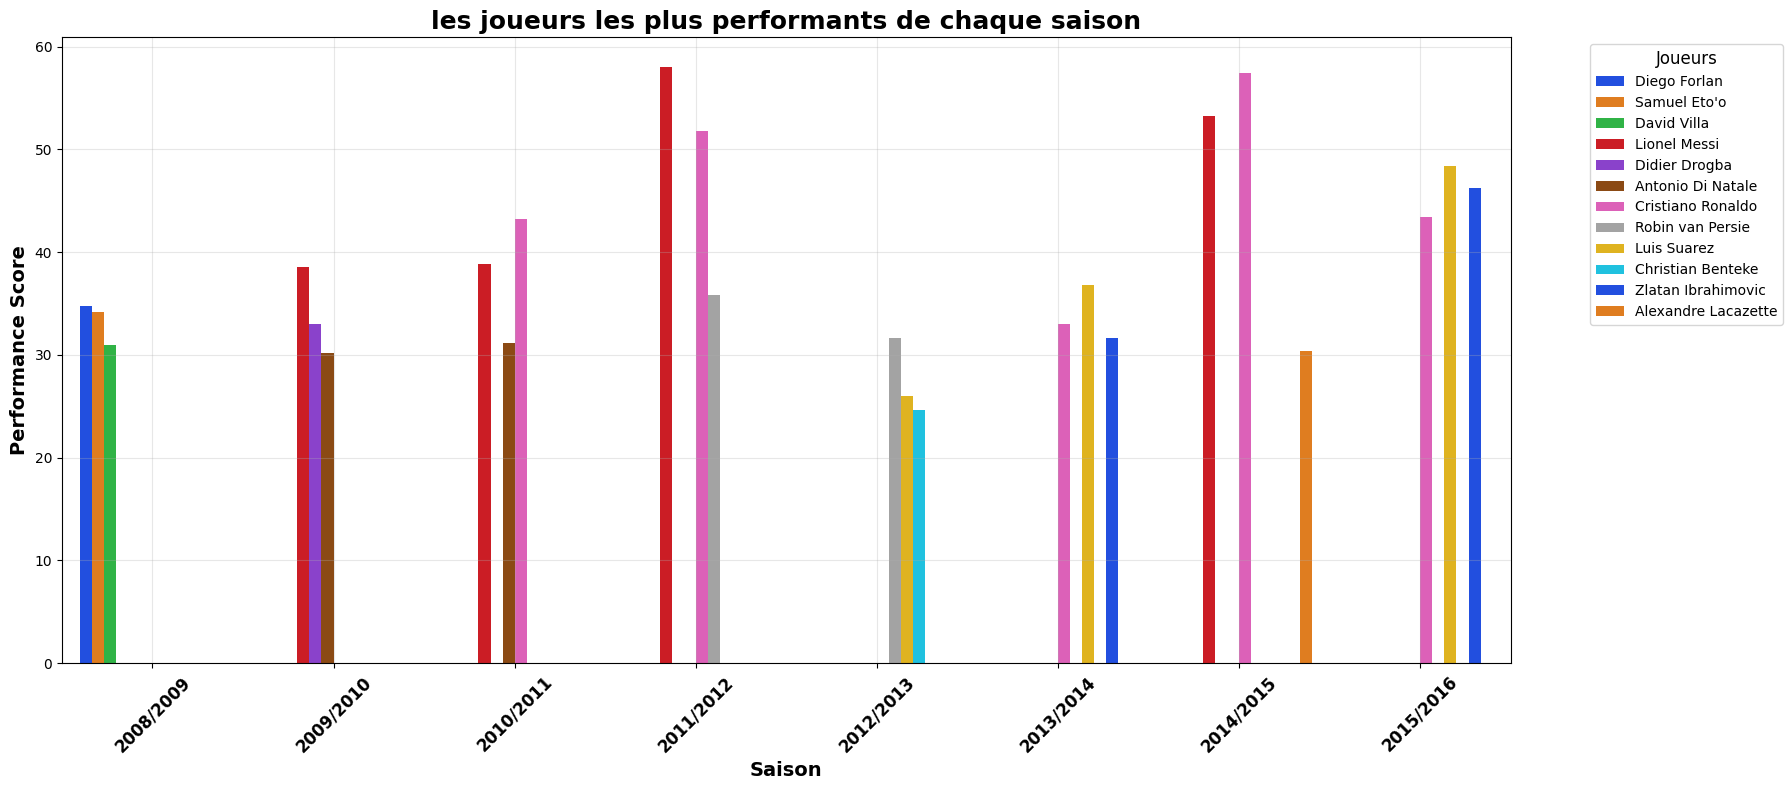

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

goal_scorers_assists['performance_score'] = (
    goal_scorers_assists['goals'] + goal_scorers_assists['assists'] * 0.4
)

top_players = (
    goal_scorers_assists.groupby('season')
    .apply(lambda x: x.nlargest(3, 'performance_score'))
    .reset_index(drop=True)
    .sort_values(by=['season', 'performance_score'], ascending=[True, False])
)

top_players
plt.figure(figsize=(18, 8))

custom_palette = sns.color_palette("bright")  # Custom palette for players

sns.barplot(
     data=top_players,
     x='season',
     y='performance_score',
     hue='player_name',
     dodge=True,  
     palette=custom_palette
 )


plt.grid(visible= True 
         ,axis='both', alpha=0.3)
plt.title('les joueurs les plus performants de chaque saison', fontsize=18, fontweight='bold')
plt.xlabel('Saison', fontsize=14, fontweight='bold')
plt.ylabel('Performance Score', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12, fontweight='bold')

plt.legend(
    title='Joueurs',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    title_fontsize=12,
    fontsize=10
)

plt.tight_layout()

plt.show()


In [102]:
player_att=df_player.merge(df_player_attribute,on='player_api_id')
result=player_att.groupby('player_name').agg({
      'potential':'mean',
   'overall_rating':'mean',
   'dribbling':'mean'
   })
result_=result.sort_values(by=['potential','overall_rating','dribbling'],ascending=False).reset_index()
result_['performance_score'] = result_['potential'] + result_['overall_rating'] + result_['dribbling']
top_performers = result_.head(10)
top_performers



,player_name,potential,overall_rating,dribbling,performance_score
0,Lionel Messi,95.230769,92.192308,96.461538,283.884615
1,Cristiano Ronaldo,93.480000,91.280000,92.640000,277.400000
2,Fabio Cannavaro,90.833333,85.166667,52.000000,228.000000
3,Neymar,90.760000,83.800000,91.600000,266.160000
4,Andres Iniesta,90.560000,88.320000,90.080000,268.960000
5,Mario Goetze,90.147059,83.176471,88.617647,261.941176
6,Zlatan Ibrahimovic,90.047619,88.285714,89.380952,267.714286
7,Roy Makaay,90.000000,78.333333,71.333333,239.666667
8,James Rodriguez,89.954545,83.000000,85.000000,257.954545
9,Franck Ribery,89.916667,88.458333,92.916667,271.291667


/tmp/ipykernel_262998/1283654823.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='performance_score', y='player_name', data=top_performers, palette='viridis')


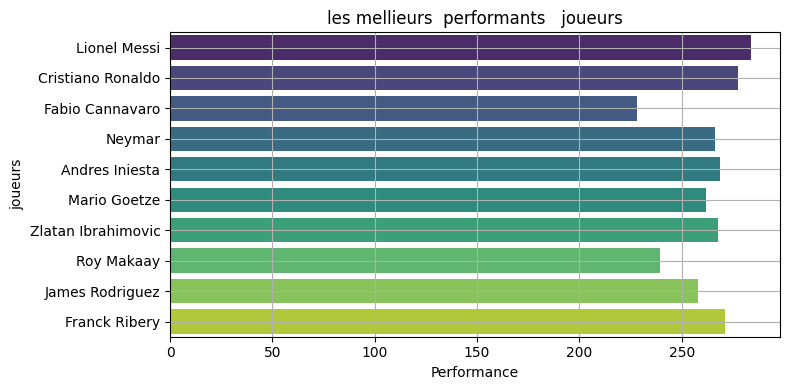

In [103]:
plt.figure(figsize=(8, 4))
sns.barplot(x='performance_score', y='player_name', data=top_performers, palette='viridis')

plt.grid()
plt.title("les mellieurs  performants   joueurs")
plt.xlabel("Performance")
plt.ylabel("joueurs")

plt.tight_layout()
plt.show()

/tmp/ipykernel_262998/1975330622.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_players))
/tmp/ipykernel_262998/1975330622.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


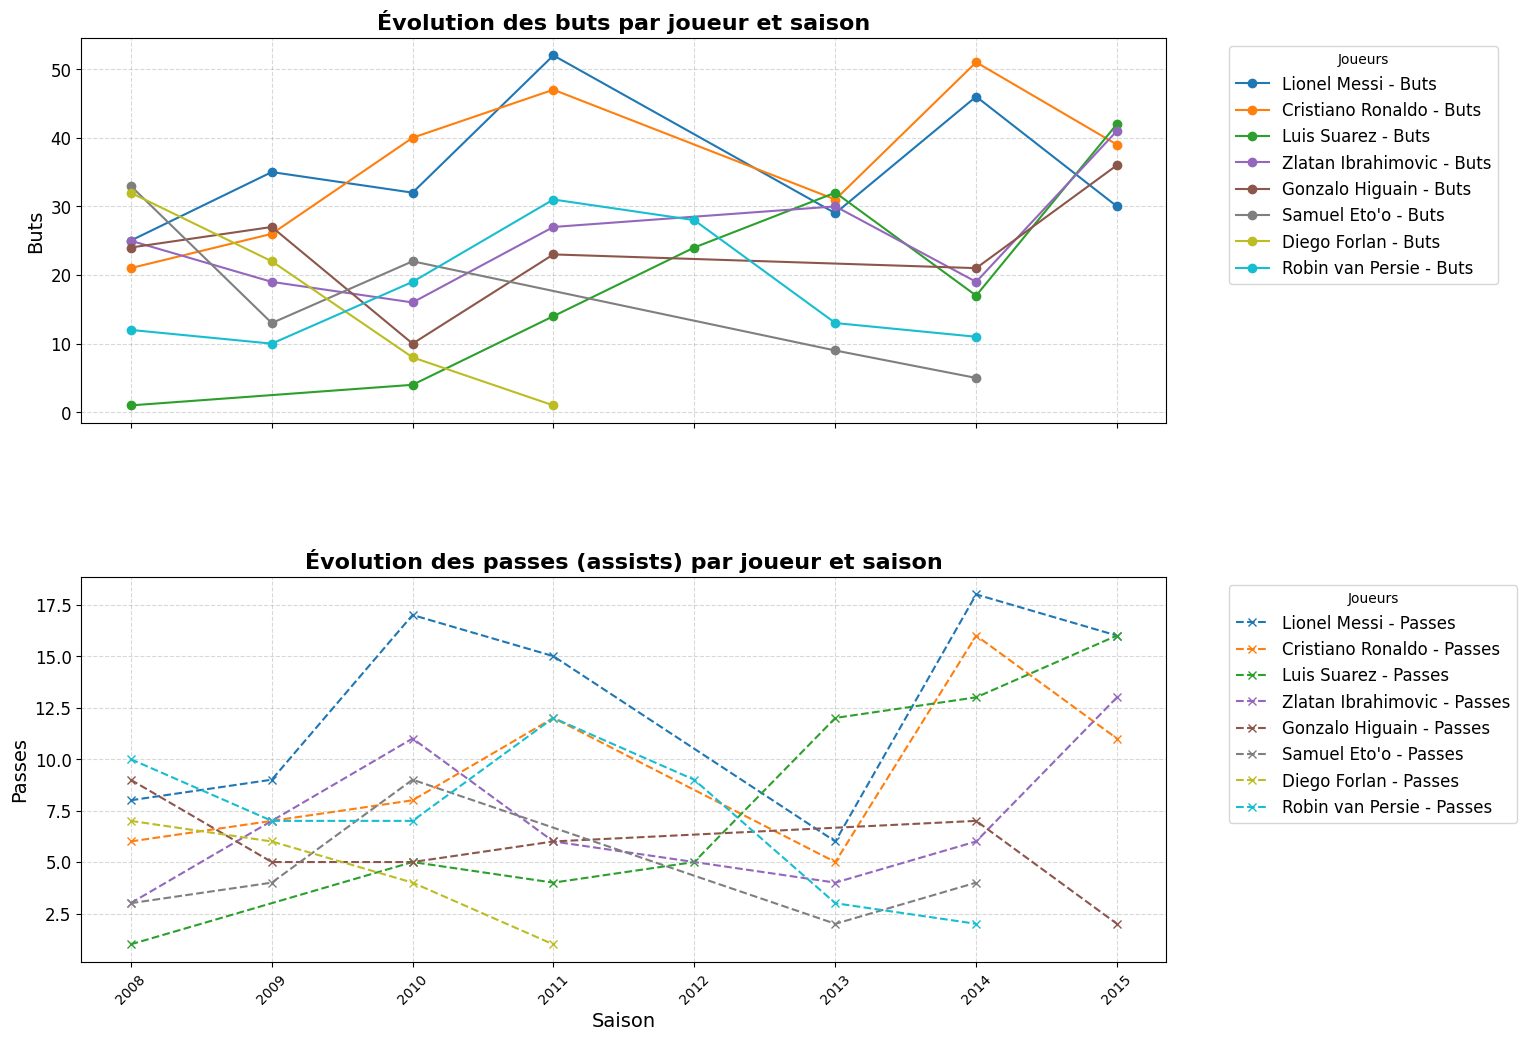

In [114]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

unique_players = goal_scorers_assists['player_name'].unique()[:8]
player_data = goal_scorers_assists[goal_scorers_assists['player_name'].isin(unique_players)]

df_new = player_data.groupby(['season', 'player_name']).agg({
    'goals': 'sum',
    'assists': 'sum'
}).reset_index()

df_new=df_new.copy()
df_new['season']=df_new['season'].apply(lambda x:x.split("/")[0])
df_new['season']=pd.to_datetime(df_new['season'])
fig, axes = plt.subplots(2, 1, figsize=(14, 12), sharex=True, gridspec_kw={'hspace': 0.4})

colors = plt.cm.get_cmap('tab10', len(unique_players))

for idx, player in enumerate(unique_players):
    player_stats = df_new[df_new['player_name'] == player]
    
    player_stats = player_stats.sort_values(by='season')
    
    axes[0].plot(
        player_stats['season'], player_stats['goals'], 
        label=f"{player} - Buts", linestyle='-', marker='o', markersize=6, color=colors(idx)
    )
    
    axes[1].plot(
        player_stats['season'], player_stats['assists'], 
        label=f"{player} - Passes", linestyle='--', marker='x', markersize=6, color=colors(idx)
    )

axes[0].set_title("Évolution des buts par joueur et saison", fontsize=16, fontweight='bold')
axes[0].set_ylabel("Buts", fontsize=14)
axes[0].grid(True, linestyle='--', color='gray', alpha=0.3)
axes[0].legend(loc='upper left', bbox_to_anchor=(1.05, 1), title="Joueurs", fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].tick_params(axis='y', labelsize=12)

axes[1].set_title("Évolution des passes (assists) par joueur et saison", fontsize=16, fontweight='bold')
axes[1].set_xlabel("Saison", fontsize=14)
axes[1].set_ylabel("Passes", fontsize=14)
axes[1].grid(True, linestyle='--', color='gray', alpha=0.3)
axes[1].legend(loc='upper left', bbox_to_anchor=(1.05, 1), title="Joueurs", fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='y', labelsize=12)

plt.tight_layout()

plt.show()


equipe:

In [ ]:
result=pd.merge(df_matchs,df_leagues,left_on='league_id',right_on='id')

result=result.merge(final_goals_df,left_on='id_x',right_on='match_id')
result_=result.groupby(['name','team'])['goals'].sum().reset_index().sort_values(by='goals',ascending=False)
result_m=pd.merge(result_,df_teams, left_on='team',right_on='team_api_id',how='inner')

result_leagues=result_m[~result_m['name'].duplicated()]

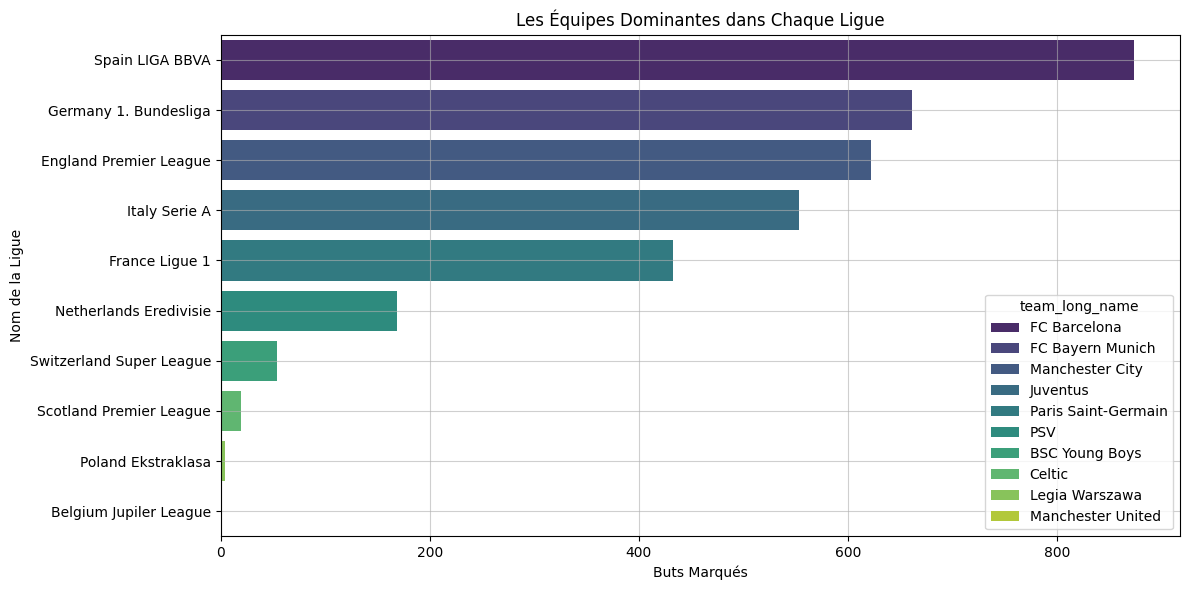

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 6))
sns.barplot(x='goals', y='name', data=result_leagues, hue='team_long_name', palette='viridis')
plt.grid(True,alpha=0.6)

plt.title("Les Équipes Dominantes dans Chaque Ligue")
plt.xlabel("Buts Marqués")
plt.ylabel("Nom de la Ligue")

plt.tight_layout()
plt.show()

In [ ]:
def assign_match_results(x):
    x['won_home'] = int(x['home_team_goal'] > x['away_team_goal'])
    x['won_away'] = int(x['home_team_goal'] < x['away_team_goal'])
    x['loss_home'] = int(x['home_team_goal'] < x['away_team_goal'])
    x['loss_away'] = int(x['home_team_goal'] > x['away_team_goal'])
    x['null'] = int(x['home_team_goal'] == x['away_team_goal'])
    return x

df_matchs = df_matchs.apply(assign_match_results, axis=1)

away_victoires = df_matchs.groupby("away_team_api_id").agg({
    'won_away': 'sum',
    'null': 'sum',
    'loss_away': 'sum'
}).sort_values(by=['won_away', 'loss_away', 'null'], ascending=False).reset_index()

final_away = pd.merge(away_victoires, df_teams, left_on='away_team_api_id', right_on='team_api_id')

home_victoires = df_matchs.groupby("home_team_api_id").agg({
    'won_home': 'sum',
    'null': 'sum',
    'loss_home': 'sum'
}).sort_values(by=['won_home', 'loss_home', 'null'], ascending=False).reset_index()

final_home = pd.merge(home_victoires, df_teams, left_on='home_team_api_id', right_on='team_api_id')

print("==> Analysis of away team victories, losses, and draws:")
print(final_away[['won_away','null','loss_away','team_long_name']].head(4))

print(final_home[['won_home','null','loss_home','team_long_name']].head(4))


==> Analysis of away team victories, losses, and draws:
   won_away  null  loss_away  team_long_name
0       103    31         18    FC Barcelona
1        99    25         28  Real Madrid CF
2        98    27         27          Celtic
3        84    36         30        Juventus
   won_home  null  loss_home     team_long_name
0       131    12          9       FC Barcelona
1       129    11         12     Real Madrid CF
2       120    23          9             Celtic
3       116    16         20  Manchester United


/tmp/ipykernel_25487/2564571904.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=home_melted, x='Équipe', y='Nombre', hue='Résultat', palette='Blues', ci=None,
/tmp/ipykernel_25487/2564571904.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=away_melted, x='Équipe', y='Nombre', hue='Résultat', palette='Greens', ci=None,


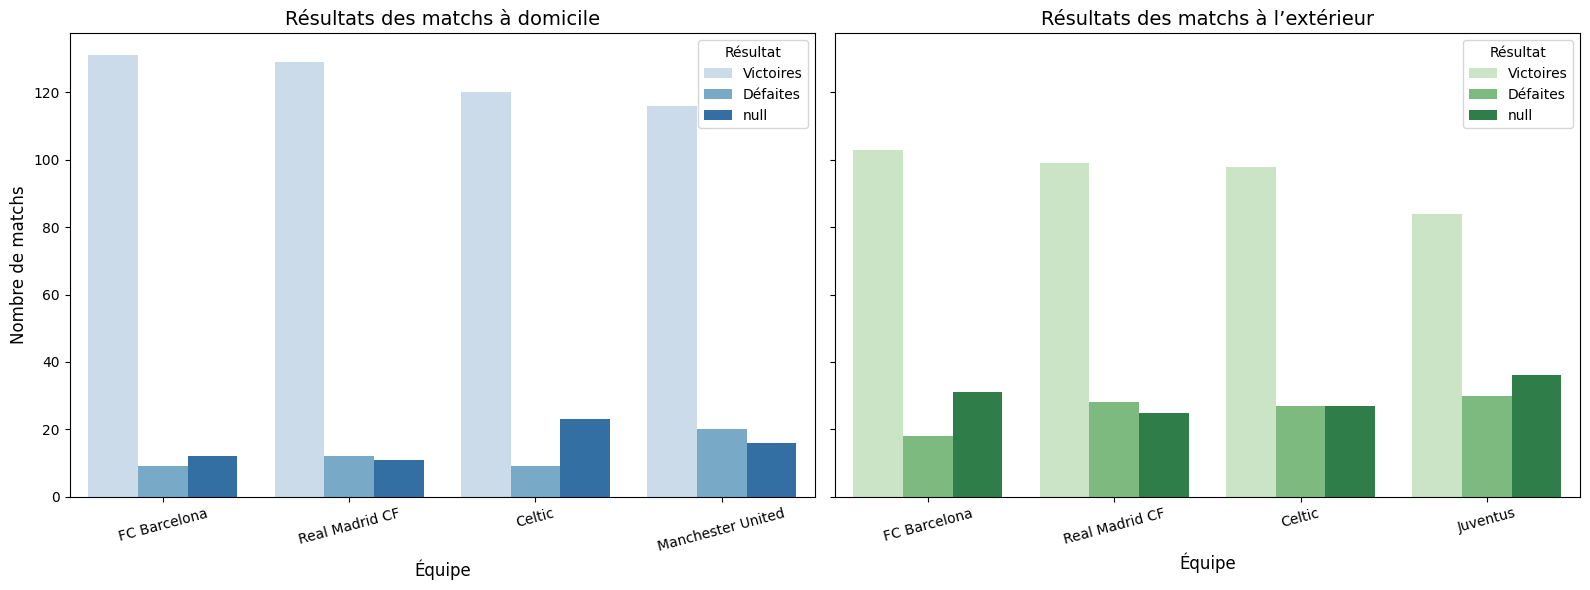

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

home_data = final_home[['won_home', 'null', 'loss_home', 'team_long_name']].head(4)
away_data = final_away[['won_away', 'null', 'loss_away', 'team_long_name']].head(4)

home_data = home_data.rename(columns={'won_home': 'Victoires', 'loss_home': 'Défaites', 'team_long_name': 'Équipe'})
away_data = away_data.rename(columns={'won_away': 'Victoires', 'loss_away': 'Défaites', 'team_long_name': 'Équipe'})

home_melted = home_data.melt(
id_vars=['Équipe'], 
value_vars=['Victoires', 'Défaites', 'null'], 
var_name='Résultat', 
value_name='Nombre')
away_melted = away_data.melt(id_vars=['Équipe'], 
value_vars=['Victoires', 'Défaites', 'null'], 
var_name='Résultat', 
value_name='Nombre')


fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

sns.barplot(data=home_melted, x='Équipe', y='Nombre', hue='Résultat', palette='Blues', ci=None, 
            hue_order=['Victoires', 'Défaites', 'null'], ax=axes[0])
axes[0].set_title('Résultats des matchs à domicile', fontsize=14)  
axes[0].set_xlabel('Équipe', fontsize=12)  
axes[0].set_ylabel('Nombre de matchs', fontsize=12)  
axes[0].tick_params(axis='x', rotation=15)  

sns.barplot(data=away_melted, x='Équipe', y='Nombre', hue='Résultat', palette='Greens', ci=None, 
            hue_order=['Victoires', 'Défaites', 'null'], ax=axes[1])
axes[1].set_title('Résultats des matchs à l’extérieur', fontsize=14)  
axes[1].set_xlabel('Équipe', fontsize=12)  
axes[1].tick_params(axis='x', rotation=15) 

axes[0].legend(title='Résultat', loc='upper right') 
axes[1].legend(title='Résultat', loc='upper right')  
plt.tight_layout()  
plt.show()  


In [378]:
# preproccessing df_team attributes
df_teams.set_index(keys='id')
full_teamatt=pd.merge(df_teams,df_teams_attributes,left_on='team_api_id',right_on='team_api_id')


#  'Little' class:  between 24 and 33
little = full_teamatt[full_teamatt['buildUpPlayDribblingClass'] == 'Little']
x_little = np.random.uniform(24.0, 33.0, little.shape[0])
full_teamatt.loc[little.index, 'buildUpPlayDribbling'] = x_little

#  'Normal' class:  between 34 and 66
normale = full_teamatt[full_teamatt['buildUpPlayDribblingClass'] == 'Normal']
x_normal = np.random.uniform(34.0, 66.0, normale.shape[0])
full_teamatt.loc[normale.index, 'buildUpPlayDribbling'] = x_normal

#  'Lots' class:  between 67 and 77
lots = full_teamatt[full_teamatt['buildUpPlayDribblingClass'] == 'Lots']
x_lots = np.random.uniform(67.0, 77.0, lots.shape[0])
full_teamatt.loc[lots.index, 'buildUpPlayDribbling'] = x_lots

full_teamatt.isna().sum()

id_x                              0
team_api_id                       0
team_fifa_api_id_x                0
team_long_name                    0
team_short_name                   0
id_y                              0
team_fifa_api_id_y                0
date                              0
buildUpPlaySpeed                  0
buildUpPlaySpeedClass             0
buildUpPlayDribbling              0
buildUpPlayDribblingClass         0
buildUpPlayPassing                0
buildUpPlayPassingClass           0
buildUpPlayPositioningClass       0
chanceCreationPassing             0
chanceCreationPassingClass        0
chanceCreationCrossing            0
chanceCreationCrossingClass       0
chanceCreationShooting            0
chanceCreationShootingClass       0
chanceCreationPositioningClass    0
defencePressure                   0
defencePressureClass              0
defenceAggression                 0
defenceAggressionClass            0
defenceTeamWidth                  0
defenceTeamWidthClass       

In [400]:

attack=full_teamatt.groupby('team_api_id').agg({
    'buildUpPlaySpeed':'mean',
    'buildUpPlayDribbling':'mean',
    # 'buildUpPlayPassing':'mean',
    # 'chanceCreationCrossing':'mean',
    # 'defenceAggression':'mean',
    'chanceCreationShooting':'mean'

}).sort_values(by=['buildUpPlaySpeed','buildUpPlayDribbling','chanceCreationShooting'],ascending=False)
# attack.reset_index()
attack_team=pd.merge(attack,df_teams,on='team_api_id')
attack_team.head()



,team_api_id,buildUpPlaySpeed,buildUpPlayDribbling,chanceCreationShooting,id,team_fifa_api_id,team_long_name,team_short_name
0,9789,72.500000,32.859331,66.333333,15620,22.0,Borussia Dortmund,DOR
1,8600,71.000000,36.869079,54.333333,20531,55.0,Udinese,UDI
2,8596,70.000000,29.348115,70.000000,39387,79.0,Falkirk,FAL
3,158085,67.000000,46.716539,46.000000,37696,112513.0,FC Arouca,ARO
4,8178,66.833333,28.525143,53.000000,15619,32.0,Bayer 04 Leverkusen,LEV


In [401]:

defence=full_teamatt.groupby('team_api_id').agg({
    
    # 'buildUpPlayPassing':'mean',
    # 'chanceCreationCrossing':'mean',
    'defenceAggression':'mean',
   

}).sort_values(by='defenceAggression',ascending=False)
# defence.reset_index()
defence_team=pd.merge(defence,df_teams,on='team_api_id')
defence_team.head()
# defence_team[defence_team['team_long_name']=='FC Barcelona']

,team_api_id,defenceAggression,id,team_fifa_api_id,team_long_name,team_short_name
0,9999,70.000000,13,546.0,KSV Roeselare,ROS
1,8242,70.000000,31452,1564.0,Odra Wodzisław,ODR
2,8596,70.000000,39387,79.0,Falkirk,FAL
3,9789,69.166667,15620,22.0,Borussia Dortmund,DOR
4,9905,62.500000,16243,169.0,1. FSV Mainz 05,MAI


In [402]:

passes=full_teamatt.groupby('team_api_id').agg({
    
    'buildUpPlayPassing':'mean',
    'chanceCreationCrossing':'mean',
   

}).sort_values(by=['buildUpPlayPassing','chanceCreationCrossing'],ascending=False)
pass_team=pd.merge(passes,df_teams,on='team_api_id')
pass_team.head()


,team_api_id,buildUpPlayPassing,chanceCreationCrossing,id,team_fifa_api_id,team_long_name,team_short_name
0,8262,77.000000,77.000000,19917,110502.0,SV Darmstadt 98,DAR
1,8596,70.000000,70.000000,39387,79.0,Falkirk,FAL
2,10194,67.000000,64.833333,3472,1806.0,Stoke City,STK
3,8658,66.000000,64.333333,4218,88.0,Birmingham City,BIR
4,8655,63.833333,56.000000,3468,3.0,Blackburn Rovers,BLB


In [409]:
# match
def create_scores(x):
   df_matchs['scores']=df_matchs['away_team_goal']+df_matchs['home_team_goal']
df_matchs.apply(create_scores,axis=1)

match_home_away=df_matchs[['away_team_goal','home_team_goal','scores']].sort_values(by='scores',ascending=False).reset_index()
print(match_home_away.head(20))


    index  away_team_goal  home_team_goal  scores
0   24247               2              10      12
1   20106               6               6      12
2    9210               2               9      11
3   23443               3               7      10
4   24122               8               2      10
5   14223               4               6      10
6    3368               3               7      10
7    2156               1               9      10
8    5191               5               5      10
9   24015               1               9      10
10  24113               3               7      10
11   3565               5               5      10
12   3092               2               8      10
13  13898               0              10      10
14  15437               6               3       9
15   7072               7               2       9
16   5600               3               6       9
17   9763               5               4       9
18   3869               6               3       9


Index(['level_0', 'index', 'away_team_goal', 'home_team_goal', 'scores', 'id',
       'team_api_id', 'team_fifa_api_id', 'team_long_name', 'team_short_name'],
      dtype='object')

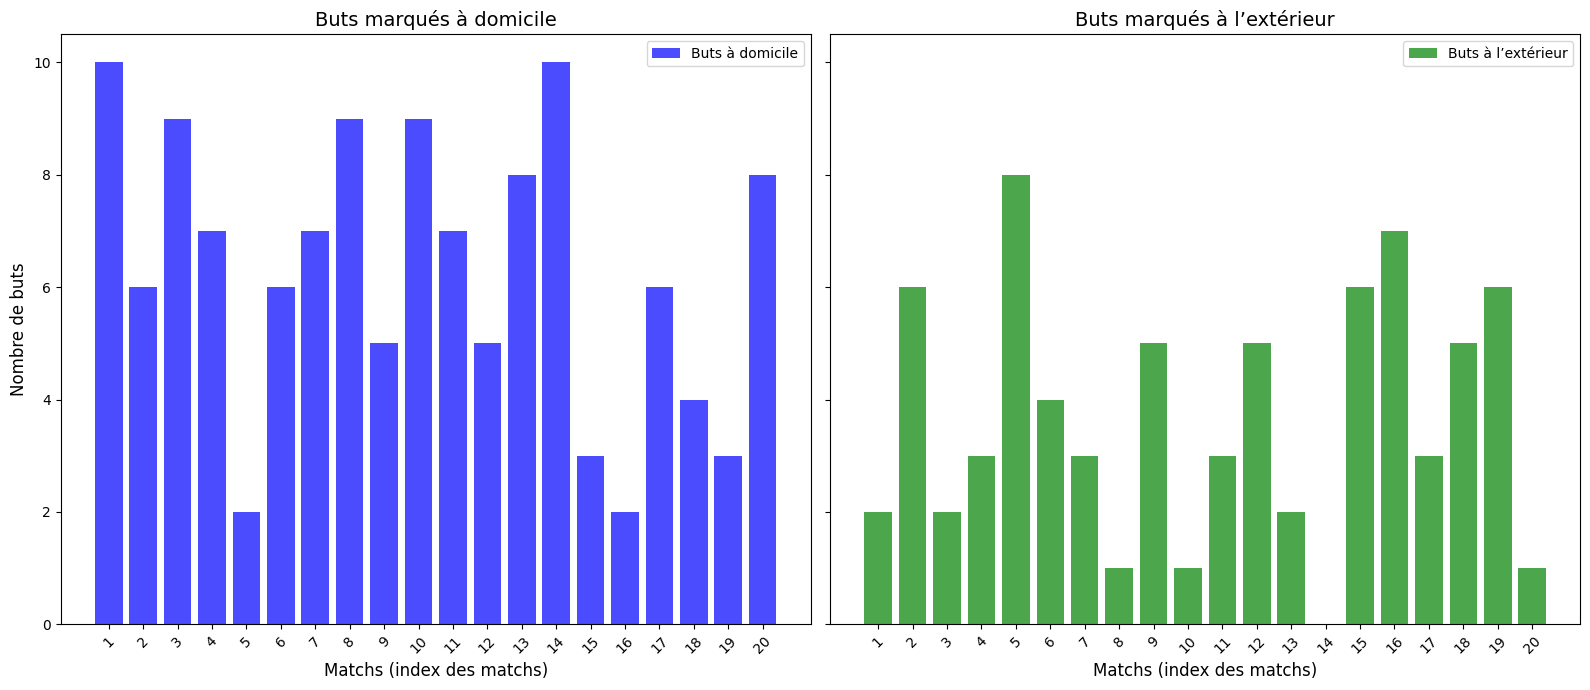

In [411]:
top_20_matches=match_home_away.head(20)
fig, axes = plt.subplots(1, 2, figsize=(16, 7), sharey=True)

axes[0].bar(range(len(top_20_matches)), top_20_matches['home_team_goal'], color='blue', alpha=0.7, label='Buts à domicile')
axes[0].set_title('Buts marqués à domicile', fontsize=14)
axes[0].set_xlabel('Matchs (index des matchs)', fontsize=12)
axes[0].set_ylabel('Nombre de buts', fontsize=12)
axes[0].set_xticks(range(len(top_20_matches)))
axes[0].set_xticklabels(range(1, len(top_20_matches) + 1), rotation=45)
axes[0].legend()

axes[1].bar(range(len(top_20_matches)), top_20_matches['away_team_goal'], color='green', alpha=0.7, label='Buts à l’extérieur')
axes[1].set_title('Buts marqués à l’extérieur', fontsize=14)
axes[1].set_xlabel('Matchs (index des matchs)', fontsize=12)
axes[1].set_xticks(range(len(top_20_matches)))
axes[1].set_xticklabels(range(1, len(top_20_matches) + 1), rotation=45)
axes[1].legend()

plt.tight_layout()

plt.show()

In [225]:
def calcule_match_results(x):
    x['won_home_team'] = 'won' if x['home_team_goal'] > x['away_team_goal'] else None
    x['won_away_team'] = 'won' if x['home_team_goal'] < x['away_team_goal'] else None
    x['loss_home_team'] = 'loss' if x['home_team_goal'] < x['away_team_goal'] else None
    x['loss_away_team'] = 'loss' if x['home_team_goal'] > x['away_team_goal'] else None
    x['draw'] = np.where(x['home_team_goal'] == x['away_team_goal'], 1, 0)  
    return x
df_matchs_add = df_matchs.apply(calcule_match_results, axis=1)
away_wins=df_matchs_add.groupby("away_team_api_id").agg({'won_away_team':'count','draw':'sum','loss_away_team':'count'}).sort_values(by=['won_away_team','loss_away_team','draw'],ascending=False).reset_index()
home_wins=df_matchs_add.groupby("home_team_api_id").agg({'won_home_team':'count','draw':'sum','loss_home_team':'count'}).sort_values(by=['won_home_team','loss_home_team','draw'],ascending=False).reset_index()

final_away=pd.merge(away_wins,df_teams,left_on='away_team_api_id',right_on='team_api_id')
final_away.rename(columns={
'team_api_id':'team_api_id_away',
'team_fifa_api_id':'team_fifa_api_id_away'	,
'team_long_name':'team_long_name_away'	,
'team_short_name':'team_long_name_away'

},inplace=True)
final_home=pd.merge(home_wins,df_teams,left_on='home_team_api_id',right_on='team_api_id')
final_home.rename(columns={
'team_api_id':'team_api_id_home',
'team_fifa_api_id':'team_fifa_api_id_home'	,
'team_long_name':'team_long_name_home'	,
'team_short_name':'team_long_name_home'

},inplace=True)
final_home.head()
# final_away.head()


,home_team_api_id,won_home_team,draw,loss_home_team,id,team_api_id_home,team_fifa_api_id_home,team_long_name_home,team_long_name_home
0,8634,131,12,9,43042,8634,241.0,FC Barcelona,BAR
1,8633,129,11,12,43040,8633,243.0,Real Madrid CF,REA
2,9925,120,23,9,39395,9925,78.0,Celtic,CEL
3,10260,116,16,20,3457,10260,11.0,Manchester United,MUN
4,8456,113,18,21,3466,8456,10.0,Manchester City,MCI


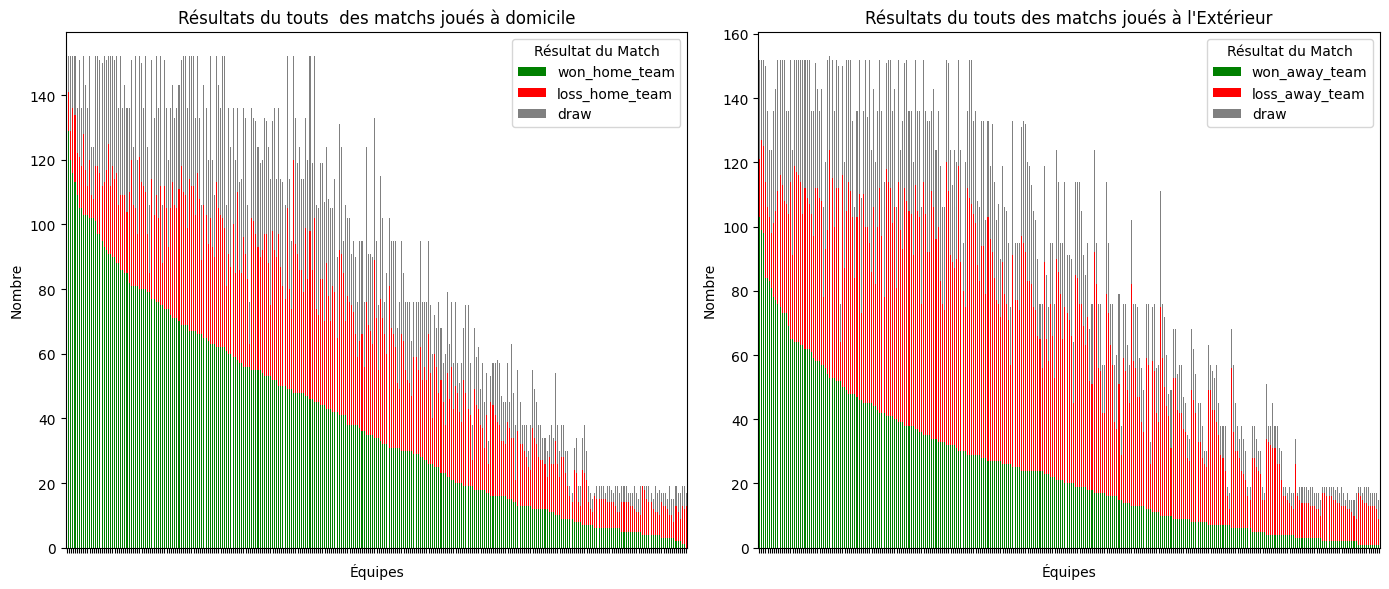

In [248]:
import matplotlib.pyplot as plt

home_results = final_home[['team_long_name_home', 'won_home_team', 'loss_home_team', 'draw']].set_index('team_long_name_home')
away_results = final_away[['team_long_name_away', 'won_away_team', 'loss_away_team', 'draw']].set_index('team_long_name_away')

# Création des graphiques
fig, ax = plt.subplots(1, 2, figsize=(14, 6))  

home_results[['won_home_team', 'loss_home_team', 'draw']].plot(kind='bar', stacked=True, ax=ax[0], color=['green', 'red', 'gray'])
ax[0].set_title('Résultats du touts  des matchs joués à domicile')
ax[0].set_ylabel('Nombre')
ax[0].set_xlabel('Équipes')
ax[0].legend(title='Résultat du Match', loc='upper right')
ax[0].set_xticklabels([])

away_results[['won_away_team', 'loss_away_team', 'draw']].plot(kind='bar', stacked=True, ax=ax[1], color=['green', 'red', 'gray'])
ax[1].set_title('Résultats du touts des matchs joués à l\'Extérieur')
ax[1].set_ylabel('Nombre')
ax[1].set_xlabel('Équipes')
ax[1].legend(title='Résultat du Match', loc='upper right')
ax[1].set_xticklabels([])

plt.tight_layout()
plt.show()


In [65]:
# player_att['date']=player_att['date'].apply(lambda x:x.split(" ")[0])

# player_att['date']=player_att['date'].apply(lambda x:x.split("-")[0])

# player_att['date']=pd.to_datetime(player_att['date'])


performance = player_att.groupby(['date', 'player_name']).agg({
    'overall_rating': 'mean',
    'potential': 'mean'
}).sort_values(by=['overall_rating', 'potential'], ascending=False).reset_index()

# # Remove duplicated dates and keep only the first occurrence


# # Print the final result
performance_no_duplicates = performance[~performance['date'].duplicated()]
performance_no_duplicates=performance_no_duplicates.sort_values(by='date')
performance_no_duplicates


,date,player_name,overall_rating,potential
8,2007-01-01,Gianluigi Buffon,92.000000,93.000000
12,2008-01-01,Cristiano Ronaldo,91.000000,94.000000
18,2009-01-01,Iker Casillas,90.500000,92.000000
23,2010-01-01,Lionel Messi,90.000000,94.500000
5,2011-01-01,Lionel Messi,92.000000,95.000000
1,2012-01-01,Lionel Messi,94.000000,96.000000
0,2013-01-01,Lionel Messi,94.000000,97.000000
3,2014-01-01,Lionel Messi,93.333333,95.666667
2,2015-01-01,Lionel Messi,93.428571,94.428571
24,2016-01-01,Neymar,90.000000,94.000000


In [227]:
per_players=performance[performance['player_name']=='Lionel Messi'].sort_values(by='date',ascending=True)

/tmp/ipykernel_262998/1744780655.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='date', y='overall_rating', data=per_players, palette='viridis', ax=ax[0])
/tmp/ipykernel_262998/1744780655.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
/tmp/ipykernel_262998/1744780655.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='date', y='potential', data=per_players, palette='viridis', ax=ax[1])
/tmp/ipykernel_262998/1744780655.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or us

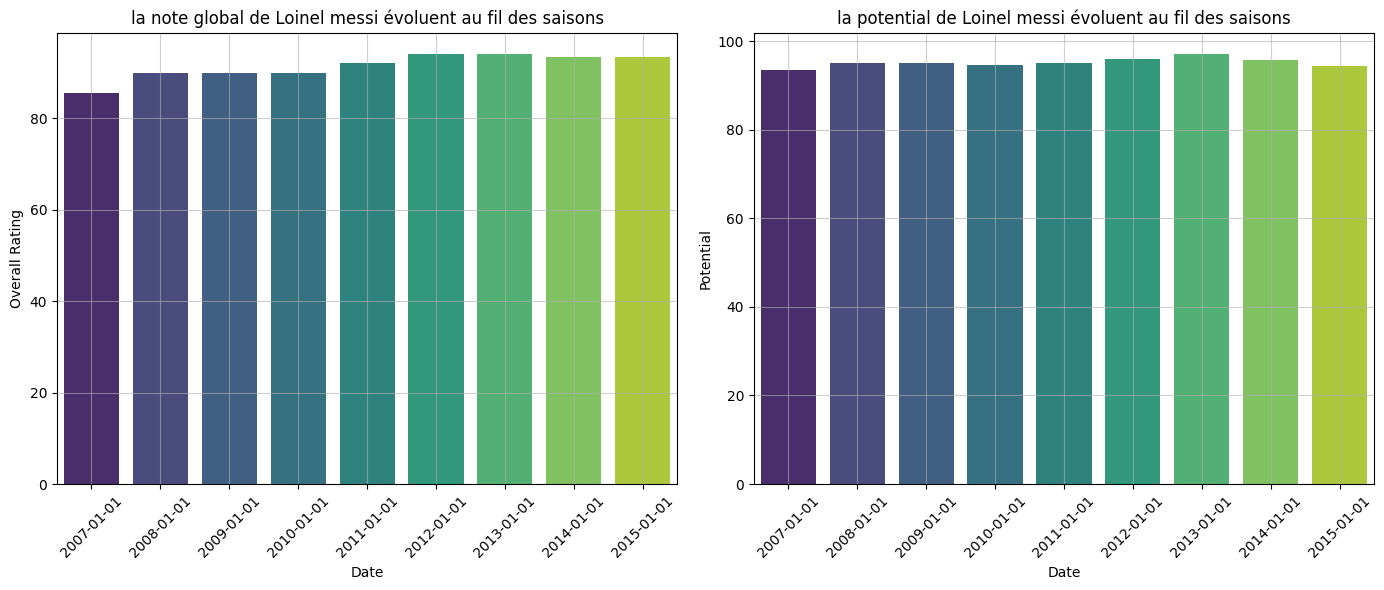

In [245]:
from matplotlib import pyplot as plt
import seaborn as sns  # Required for barplot

# Creating subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))  

# First subplot
sns.barplot(x='date', y='overall_rating', data=per_players, palette='viridis', ax=ax[0])
ax[0].grid(True, alpha=0.6)
ax[0].set_title("la note global de Loinel messi évoluent au fil des saisons")
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Overall Rating")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)  

sns.barplot(x='date', y='potential', data=per_players, palette='viridis', ax=ax[1])
ax[1].grid(True, alpha=0.6)
ax[1].set_title("la potential de Loinel messi évoluent au fil des saisons")
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Potential")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)  

plt.tight_layout()
plt.show()


In [144]:
player_att.drop(columns=['attacking_work_rate','defensive_work_rate'],inplace=True)


Clustering
=>cluster joueurs en function des attributes

In [214]:
from pre_proccessing import fillplayerAtt
fillplayerAtt.filln_player_attribute(df_player_attribute)

overall_rating        0
potential             0
preferred_foot        0
crossing              0
finishing             0
heading_accuracy      0
short_passing         0
volleys               0
dribbling             0
curve                 0
free_kick_accuracy    0
long_passing          0
ball_control          0
acceleration          0
sprint_speed          0
agility               0
reactions             0
balance               0
shot_power            0
jumping               0
stamina               0
strength              0
long_shots            0
aggression            0
interceptions         0
positioning           0
vision                0
penalties             0
marking               0
standing_tackle       0
sliding_tackle        0
gk_diving             0
gk_handling           0
gk_kicking            0
gk_positioning        0
gk_reflexes           0
dtype: int64


/home/usmail/ism/.aafootball_machine_learning/src/pre_proccessing/fillplayerAtt.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_player_attribute[col].fillna(mean_value, inplace=True)  # Fill NaNs with the mean
/home/usmail/ism/.aafootball_machine_learning/src/pre_proccessing/fillplayerAtt.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermedi

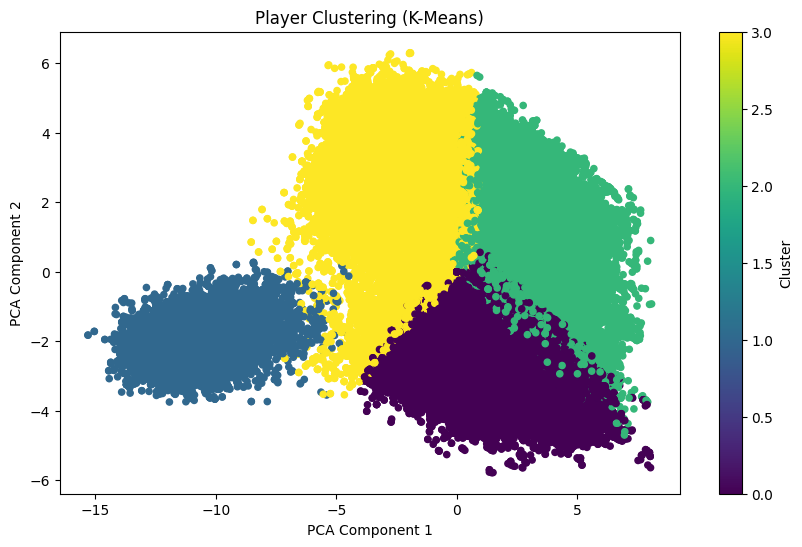

In [221]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

att = df_player_attribute[['overall_rating', 'potential', 'crossing', 'finishing', 'heading_accuracy',
           'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
           'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility',
           'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength',
           'long_shots', 'aggression', 'interceptions', 'positioning', 'vision',
           'penalties', 'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving',
           'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes']]

normalized = StandardScaler()
scaled_attributes = normalized.fit_transform(att)



kmeans = KMeans(n_clusters=4, random_state=42)
df_player_attribute['cluster_kmeans'] = kmeans.fit_predict(scaled_attributes)

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_attributes)

plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df_player_attribute['cluster_kmeans'], cmap='viridis', s=20)
plt.title('Player Clustering (K-Means)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
cluster_counts = df_player_attribute['cluster_kmeans'].value_counts()
print("Cluster Distribution:")
print(cluster_counts)
centroids = kmeans.cluster_centers_

original_centroids = normalized.inverse_transform(centroids)
centroid_df = pd.DataFrame(original_centroids, columns=att.columns)

print("Cluster Centroids (Original Scale):")
centroid_df.reset_index()


Cluster Distribution:
cluster_kmeans
0    64959
2    52137
3    51979
1    14903
Name: count, dtype: int64
Cluster Centroids (Original Scale):


,index,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,0,68.789224,74.061628,59.571907,65.641970,57.621673,64.894610,61.906735,69.915609,61.462436,...,63.034076,62.891331,28.225105,32.004046,29.455011,9.911272,11.504339,15.269207,11.383023,11.346371
1,1,68.142656,72.518553,18.819231,18.200564,19.245253,28.053680,17.650398,18.930752,18.017476,...,31.636081,29.615849,18.497484,19.030799,18.329949,69.779306,66.310407,64.157955,67.124069,71.343085
2,2,72.925226,76.671793,67.089828,54.457541,63.426607,73.132997,56.416259,67.946379,63.361302,...,67.766639,61.726105,63.170470,68.242712,65.497639,9.888693,11.813171,20.461664,11.861595,11.842724
3,3,64.158713,69.760132,47.847247,34.839883,61.539991,58.472314,36.094886,48.507152,41.952104,...,49.032043,45.694647,61.583654,64.288799,62.111493,9.734254,11.618300,16.320772,11.730485,11.680285


Clustering des Équipes :

====>  Clustering des Équipes :

Critères de Clustering : Vitesse de construction, pression défensive, précision des passes, et style de jeu.

Ajoutez des métriques comme les buts marqués et encaissés pour enrichir l’analyse.


In [ ]:
df_teams.set_index(keys='id')
full_teamatt=pd.merge(df_teams,df_teams_attributes,left_on='team_api_id',right_on='team_api_id')
full_teamatt

# full_teamatt.isna().sum()
# full_teamatt.info()
full_teamatt['buildUpPlayDribblingClass'].unique()

array(['Little', 'Normal', 'Lots'], dtype=object)

In [250]:
from pre_proccessing import fillna_team_Att


fillna_team_Att.fillna(full_teamatt)
full_teamatt.isna().sum()


id_x                              0
team_api_id                       0
team_fifa_api_id_x                0
team_long_name                    0
team_short_name                   0
id_y                              0
team_fifa_api_id_y                0
date                              0
buildUpPlaySpeed                  0
buildUpPlaySpeedClass             0
buildUpPlayDribbling              0
buildUpPlayDribblingClass         0
buildUpPlayPassing                0
buildUpPlayPassingClass           0
buildUpPlayPositioningClass       0
chanceCreationPassing             0
chanceCreationPassingClass        0
chanceCreationCrossing            0
chanceCreationCrossingClass       0
chanceCreationShooting            0
chanceCreationShootingClass       0
chanceCreationPositioningClass    0
defencePressure                   0
defencePressureClass              0
defenceAggression                 0
defenceAggressionClass            0
defenceTeamWidth                  0
defenceTeamWidthClass       

Best k based on Silhouette Score: 5 with score: 0.13351641699295563


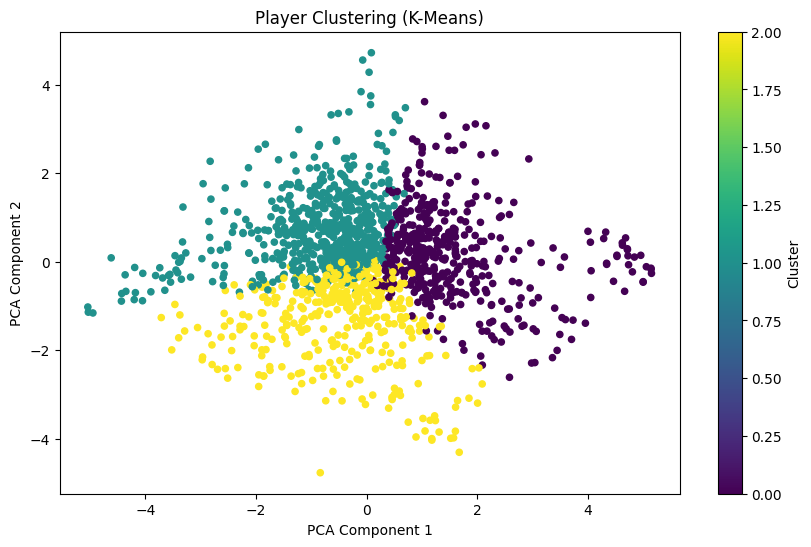

In [253]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

att = full_teamatt[[
       'buildUpPlaySpeed','buildUpPlayDribbling',
        'buildUpPlayPassing',
        
       'chanceCreationPassing', 
       'chanceCreationCrossing', 
       'chanceCreationShooting',
         'defencePressure',
       'defenceAggression', 
       'defenceTeamWidth'      
]]

normalized = StandardScaler()
scaled_attributes_team = normalized.fit_transform(att)

best_k = 0
best_score = -1

for k in range(2, 11):  
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_attributes_team)
    score = silhouette_score(scaled_attributes_team, kmeans.labels_)
    
    if score > best_score:
        best_score = score
        best_k = k

print(f"Best k based on Silhouette Score: {best_k} with score: {best_score}")

kmeans = KMeans(n_clusters=3, random_state=42)
full_teamatt['cluster_kmeans'] = kmeans.fit_predict(scaled_attributes_team)

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_attributes_team)

plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=full_teamatt['cluster_kmeans'], cmap='viridis', s=20)
plt.title('Player Clustering (K-Means)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


Best k based on BIC: 3 with BIC: 30316.16536127898


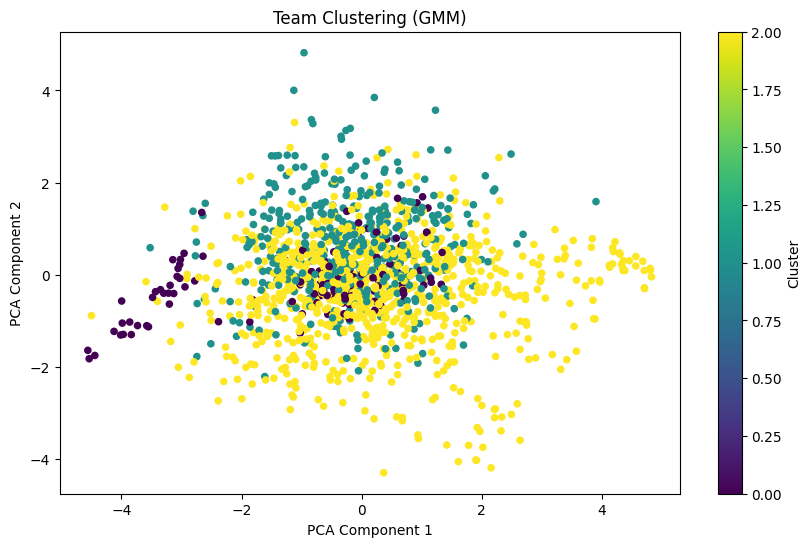

In [258]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Select relevant attributes
att = full_teamatt[[
    'buildUpPlaySpeed', 'buildUpPlayDribbling',
    'chanceCreationPassing', 'chanceCreationCrossing', 'chanceCreationShooting',
    'defencePressure', 'defenceAggression', 'defenceTeamWidth'
]]

# Normalize the data
normalized = StandardScaler()
scaled_attributes_team = normalized.fit_transform(att)

# Determine the best number of components for GMM
best_bic = np.inf
best_k = 0

for k in range(2, 11):  # Try k from 2 to 10
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(scaled_attributes_team)
    bic = gmm.bic(scaled_attributes_team)
    
    if bic < best_bic:
        best_bic = bic
        best_k = k

print(f"Best k based on BIC: 3 with BIC: {best_bic}")

# Apply GMM with the best k (or 3 for a reasonable guess)
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(scaled_attributes_team)  # Fit the model with the data

# Now you can predict cluster labels after fitting
full_teamatt['cluster_gmm'] = gmm.predict(scaled_attributes_team)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_attributes_team)

# Scatter plot of the clusters
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=full_teamatt['cluster_gmm'], cmap='viridis', s=20)
plt.title('Team Clustering (GMM)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()
